**Programming solution for loan approval process**

In [ ]:
!pip install pandas
!pip install numpy
!pip install tabula-py
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import tabula as tab
import matplotlib.pyplot as plt
import sweetviz as sv

In [ ]:
zappy_loan_excel = '/content/Zappy_Loan_Data.xlsx'
loan_data = pd.read_excel(zappy_loan_excel)
print('Rows x Cols = ', loan_data.shape)
print('Column Names = ', loan_data.columns)

Rows x Cols =  (247, 13)
Column Names =  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Graduate',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


xlsx stands for Microsoft Excel Open XML Spreadsheet and is a default file type for saving excel files. It can store a large amount of data in rows and columns and apply mathematical functions.

In [ ]:
# checking the columns and data within the data set
print(loan_data.head())
loan_data.info()

   Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0     2284       1        0           0         0              0   
1     2287       2        0           0         1              0   
2     2288       1        1           2         0              0   
3     2296       1        0           0         0              0   
4     2297       1        0           0         1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             3902             1666.0         109               333   
1             1500             1800.0         103               333   
2             2889                0.0          45               180   
3             2755                0.0          65               300   
4             2500            20000.0         103               333   

   Credit_History  Property_Area Loan_Status  
0               1              3           Y  
1               0              2           N  
2               0      

In [ ]:
pdf = '/content/Loans_Database_Table.pdf'

In [ ]:
# reading all of the pages, and if recognised as multiple tables asking to merge them together
historic_data = tab.read_pdf(pdf, pages = 'all', multiple_tables= False)[0]
print('Rows x Cols = ', historic_data.shape)
print('Column Names = ', historic_data.columns)

Rows x Cols =  (398, 13)
Column Names =  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Graduate',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


pdf is Portable Document Format, which is used to exchange documents reliably between systems, companies, emails. It can include text and images. 

In [ ]:
#info on data set
print(historic_data.head())
historic_data.info()

   Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0     1002       1        0           0         1              0   
1     1003       1        1           1         1              0   
2     1005       1        1           0         1              1   
3     1006       1        1           0         0              0   
4     1008       1        0           0         1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         128               360   
1             4583             1508.0         128               360   
2             3000                0.0          66               360   
3             2583             2358.0         120               360   
4             6000                0.0         141               360   

   Credit_History  Property_Area Loan_Status  
0               1              1           Y  
1               1              3           N  
2               1      

pdf files can embed non-text elements such as images and hyperlinks. pdf files are completely separate to the applications, operating systems, hardware,difficult to amend once created. Whilst, xlsx files can be connected to the systems, are easier to amend, and can be used to collaborate on and continue to work on, whilst pdf's will need to be saved under a new file everytime. pdf file is easily printable file, whereas xlsx will require some manipulations. 
Pdf documents will be found in legal, medical, real-estate industries, they are most likely going to be reports that have been audited, approved and published. Whereas, xlsx would have to be password protected to be shared, it is also not as visually appealing as pdf file. 

In [ ]:
# combining the two data sets and sorting them to demonstrate the code's effectiveness
frames = [loan_data, historic_data]
df = pd.concat(frames).sort_values(by='Loan_ID', ascending= True)
print(df)

     Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0       1002       1        0           0         1              0   
1       1003       1        1           1         1              0   
2       1005       1        1           0         1              1   
3       1006       1        1           0         0              0   
4       1008       1        0           0         1              0   
..       ...     ...      ...         ...       ...            ...   
242     2978       2        0           0         1              0   
243     2979       1        1           3         1              0   
244     2983       1        1           1         1              0   
245     2984       1        1           2         1              0   
246     2990       2        0           0         1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         128               360   
1            

In [ ]:
# further checks to make sure that the 2 data sets have indeed been merged
def historic_data_length():
  print('Number of rows in the pdf/historic dataset is ', len(historic_data))

def loan_data_length():
  print('Number of rows in the working spreadsheet is ', len(loan_data))

def combined_dataset_length():
  print('Number of rows in the dataset combined dataset ', len(df))

In [ ]:
historic_data_length()
loan_data_length()
combined_dataset_length()

Number of rows in the pdf/historic dataset is  398
Number of rows in the working spreadsheet is  247
Number of rows in the dataset combined dataset  645


In [ ]:
# checking the information on the merged tables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 0 to 246
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            645 non-null    int64  
 1   Gender             645 non-null    int64  
 2   Married            645 non-null    int64  
 3   Dependents         645 non-null    int64  
 4   Graduate           645 non-null    int64  
 5   Self_Employed      645 non-null    int64  
 6   ApplicantIncome    645 non-null    int64  
 7   CoapplicantIncome  645 non-null    float64
 8   LoanAmount         645 non-null    int64  
 9   Loan_Amount_Term   645 non-null    int64  
 10  Credit_History     645 non-null    int64  
 11  Property_Area      645 non-null    int64  
 12  Loan_Status        645 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 70.5+ KB


**Preparing and cleaning the loan data**

In [ ]:
#checking how many blank values are in each category of the dataframe
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# missing values replaced with a string NaN 'Not a Number'
df = df.replace("", np.nan)
print(df)

     Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0       1002       1        0           0         1              0   
1       1003       1        1           1         1              0   
2       1005       1        1           0         1              1   
3       1006       1        1           0         0              0   
4       1008       1        0           0         1              0   
..       ...     ...      ...         ...       ...            ...   
242     2978       2        0           0         1              0   
243     2979       1        1           3         1              0   
244     2983       1        1           1         1              0   
245     2984       1        1           2         1              0   
246     2990       2        0           0         1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         128               360   
1            

In [ ]:
# Listing only duplicated values based on a selection of columns
loan_duplicates = df[df.duplicated (subset = None, keep = False)]
print (loan_duplicates)

     Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
286     1925       2        0           0         1              1   
22      1925       2        0           0         1              1   
29      1945       2        0           0         1              0   
293     1945       2        0           0         1              0   
298     1955       2        0           0         1              0   
34      1955       2        0           0         1              0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
286             2600             1717.0          99               300   
22              2600             1717.0          99               300   
29              5417                0.0         143               480   
293             5417                0.0         143               480   
298             5000             2541.0         151               480   
34              5000             2541.0         151               480  

In [ ]:
def duplicated_rows():
  print(len(loan_duplicates), ' fully duplicated rows in the set.')

duplicated_rows()

6  fully duplicated rows in the set.


In [ ]:
#duplicated rows removed from data set
df.drop_duplicates(subset=None, keep = 'first', inplace=True)
print(df)
print('Number of rows in the dataframe once the duplicates have been removed ', len(df))

     Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0       1002       1        0           0         1              0   
1       1003       1        1           1         1              0   
2       1005       1        1           0         1              1   
3       1006       1        1           0         0              0   
4       1008       1        0           0         1              0   
..       ...     ...      ...         ...       ...            ...   
242     2978       2        0           0         1              0   
243     2979       1        1           3         1              0   
244     2983       1        1           1         1              0   
245     2984       1        1           2         1              0   
246     2990       2        0           0         1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         128               360   
1            

In [ ]:
# Listing duplicated values based on a Loan_ID and Loan_Status and sorting by Loan ID number
loan_ID_status_duplicates = df[df.duplicated(subset=['Loan_ID','Loan_Status'], keep = False)].sort_values(by='Loan_ID', ascending= True)
print(loan_ID_status_duplicates)

def duplicated_loanID_status():
  print(len(loan_ID_status_duplicates), ' duplicated rows based on the Loan ID and Loan Status in the set.')

duplicated_loanID_status()

     Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
275     1900       1        1           1         1              0   
11      1900       1        1           1         1              0   
276     1903       1        1           0         1              0   
12      1903       1        1           0         1              0   
277     1904       1        1           0         1              0   
13      1904       1        1           0         1              0   
278     1907       1        1           0         1              0   
14      1907       1        1           0         1              0   
279     1908       2        1           0         0              0   
15      1908       2        1           0         0              0   
280     1910       1        0           1         0              1   
16      1910       1        0           1         0              1   
281     1914       1        1           0         1              0   
17      1914       1

In [ ]:
# checking for the max values in each data column
df.max()

Loan_ID                 2990
Gender                     2
Married                    1
Dependents                 3
Graduate                   1
Self_Employed              1
ApplicantIncome        81000
CoapplicantIncome    41667.0
LoanAmount               700
Loan_Amount_Term         480
Credit_History             1
Property_Area              3
Loan_Status                Y
dtype: object

# **Descriptive analysis on current loan data**

**Metadata**:
 Gender: 1 - Male, 2 - Female
 Married: 0 - Single, 1 - Married
 Dependents: 0, 1, 2, 3+
 Graduate: 0 - No, 1 - Yes
 Self_Employed: 0 - No, 1 - Yes
 Credit History: 0 - No, 1 - Yes
 Property_Area: 1 - Urban, 2 - Semiusban, 3 - Rural 

                                             |          | [  0%]   00:00 -> (? left)


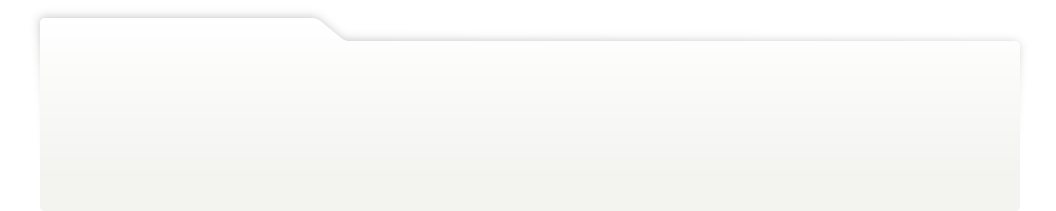
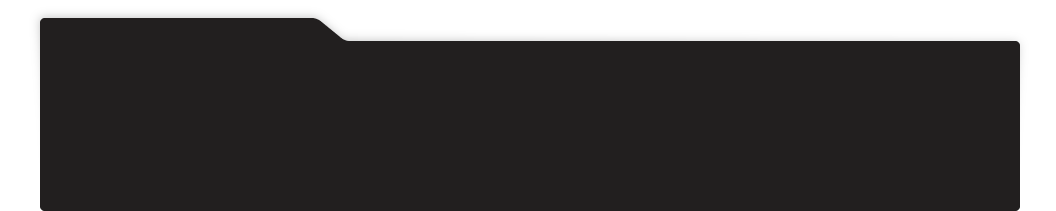
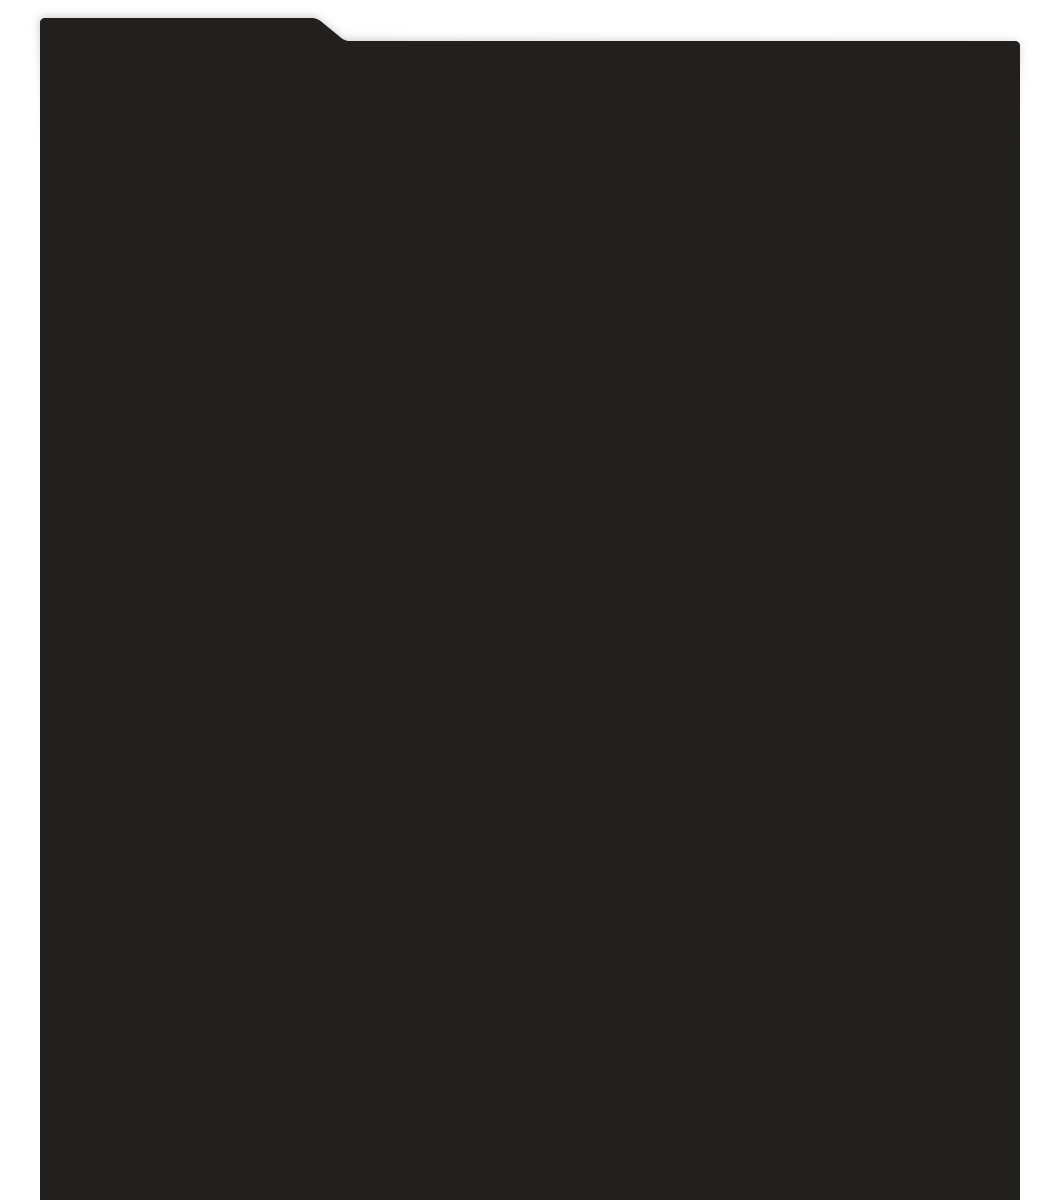
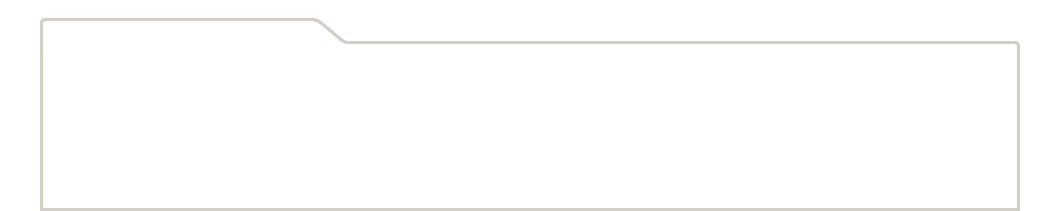
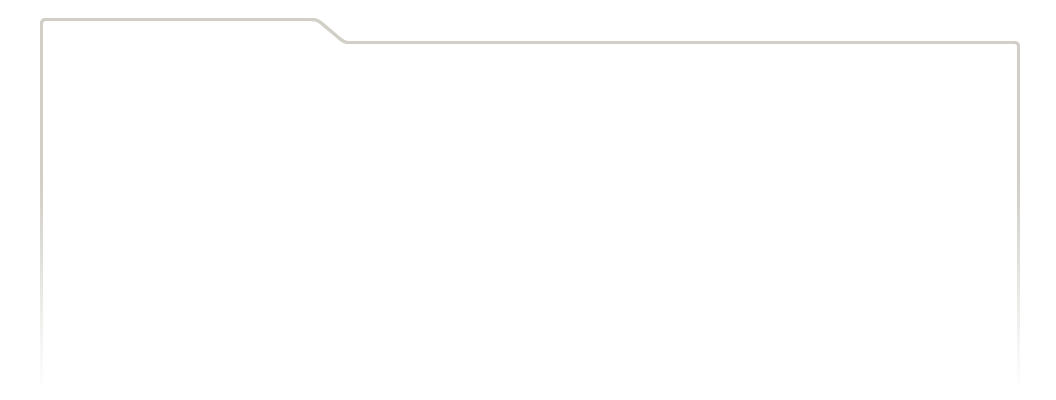
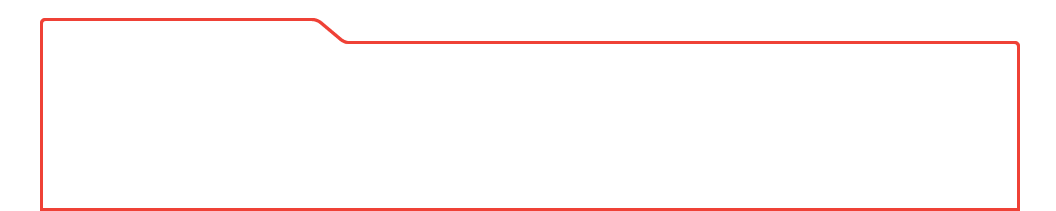
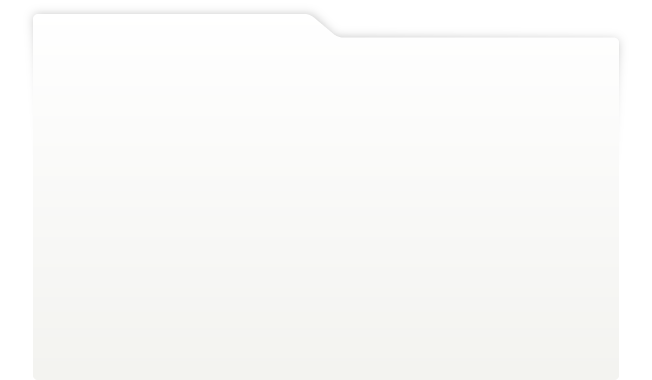
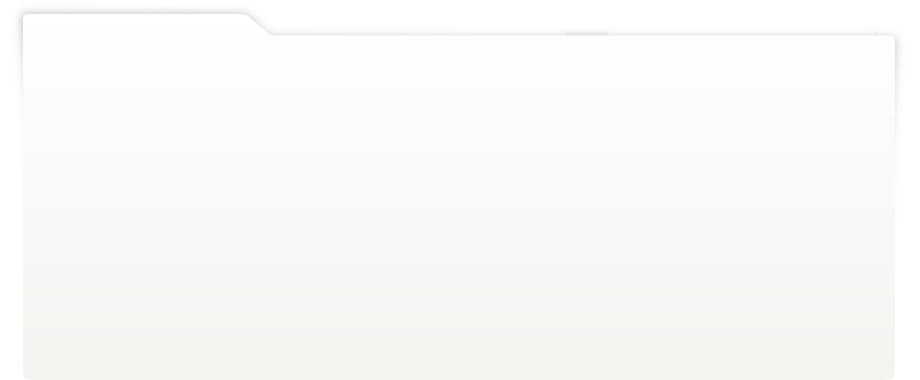
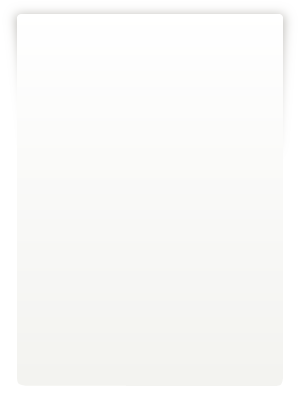
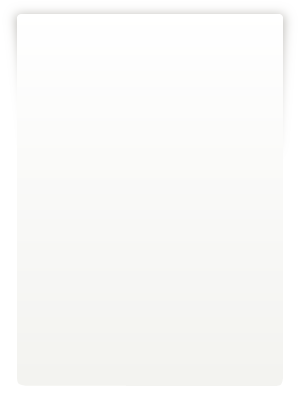
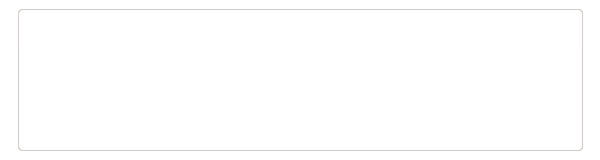
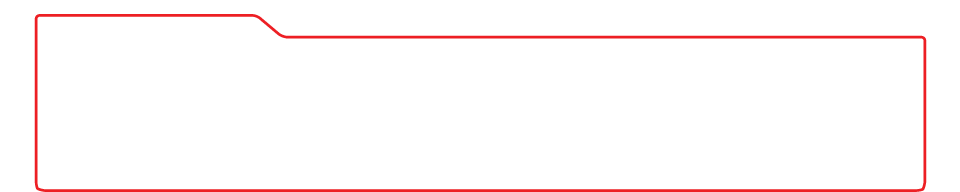
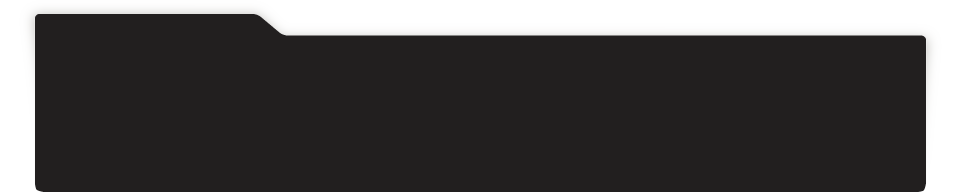
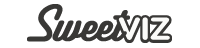
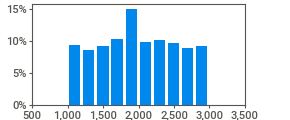
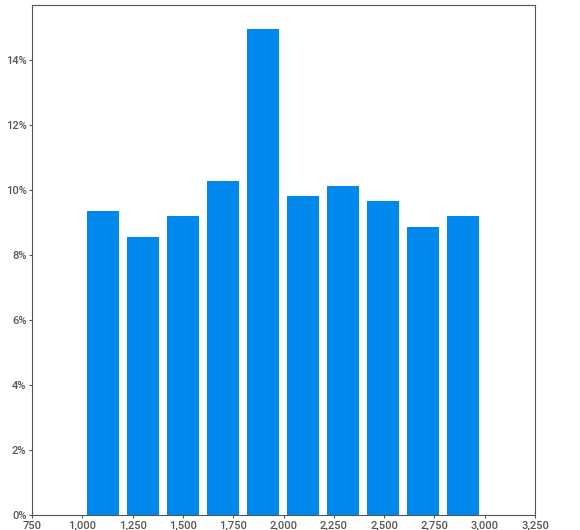
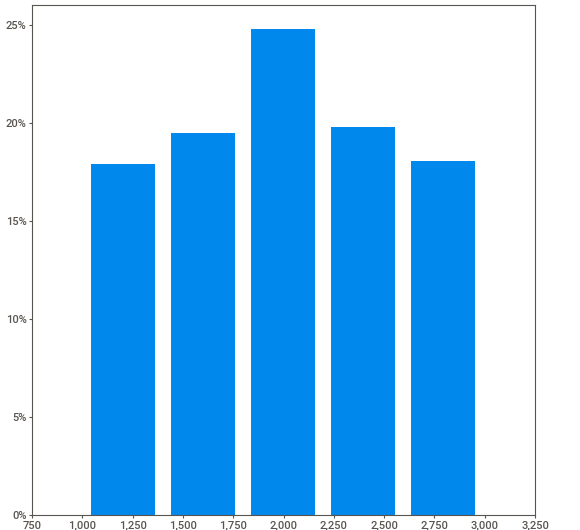
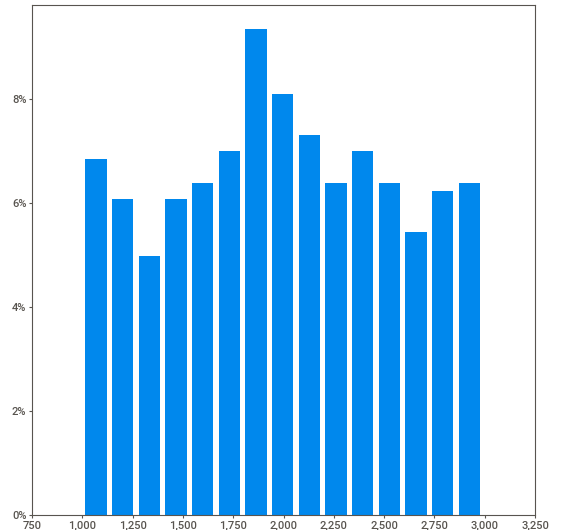
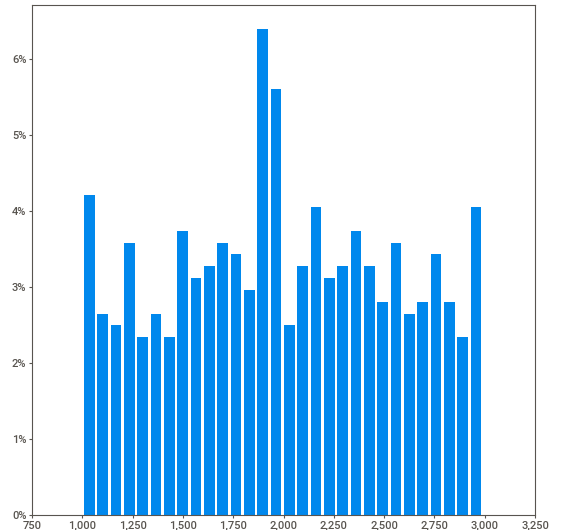
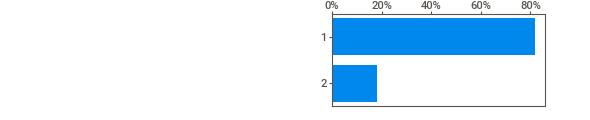
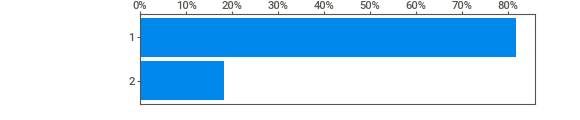
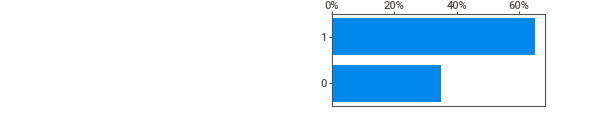
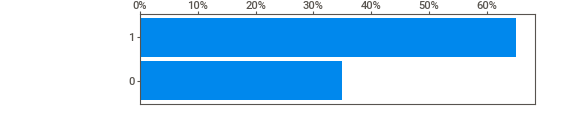
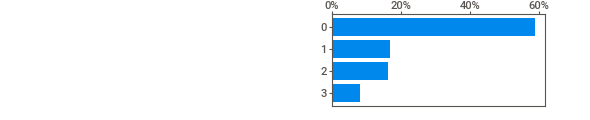
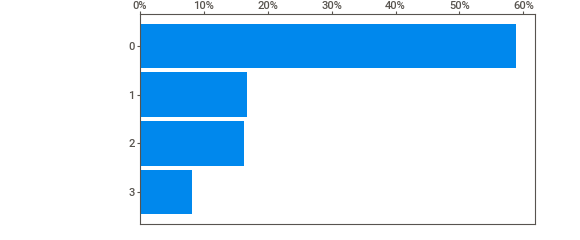
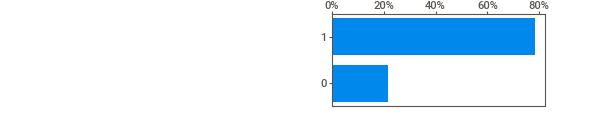
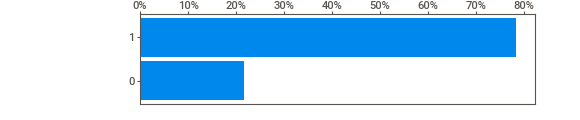
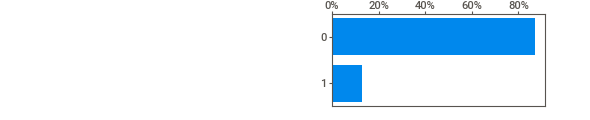
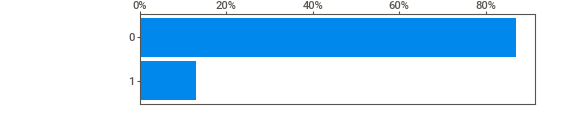
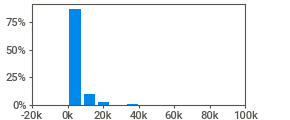
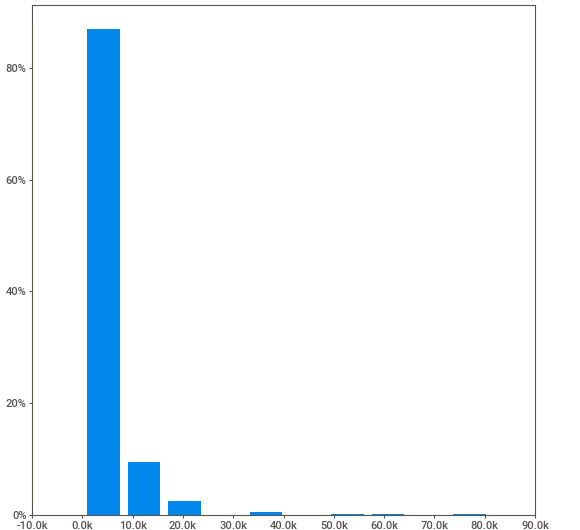
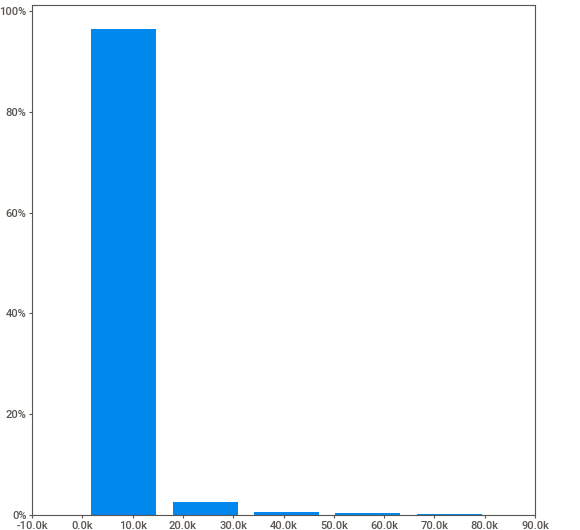
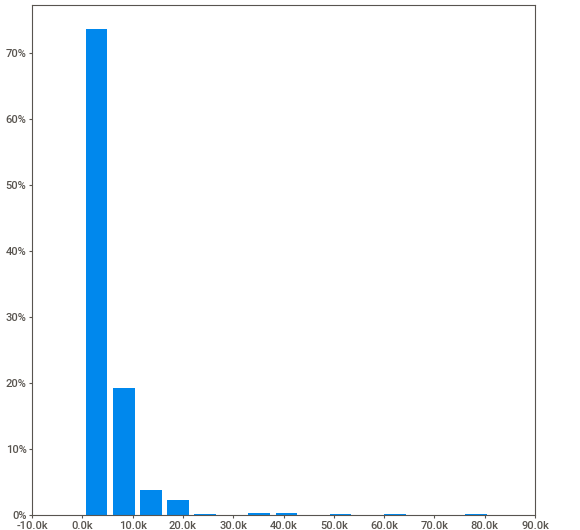
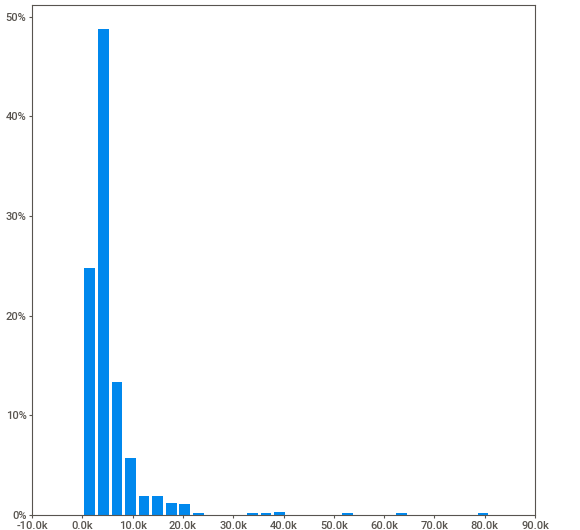
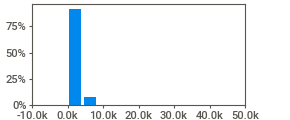
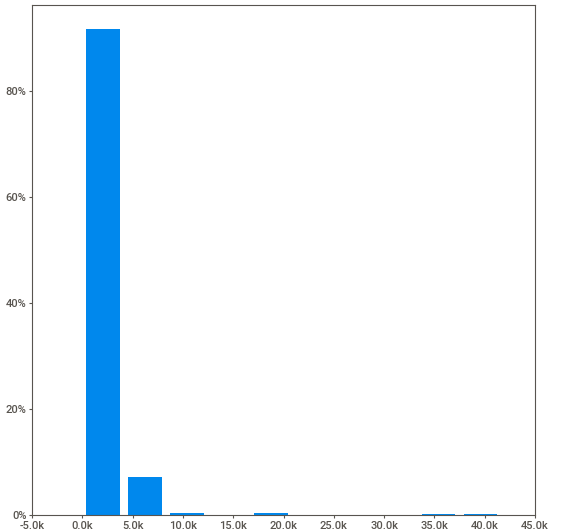
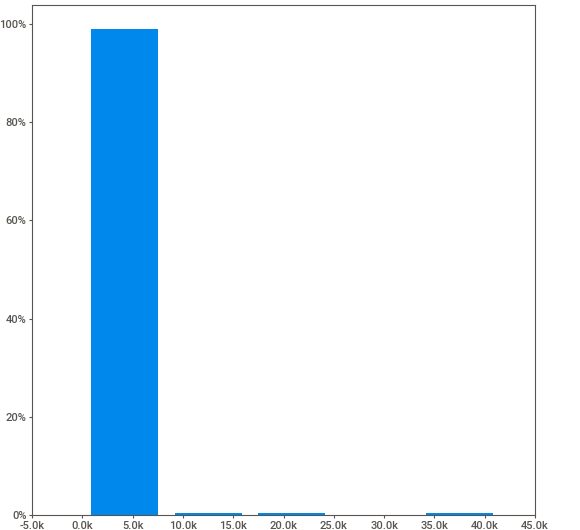
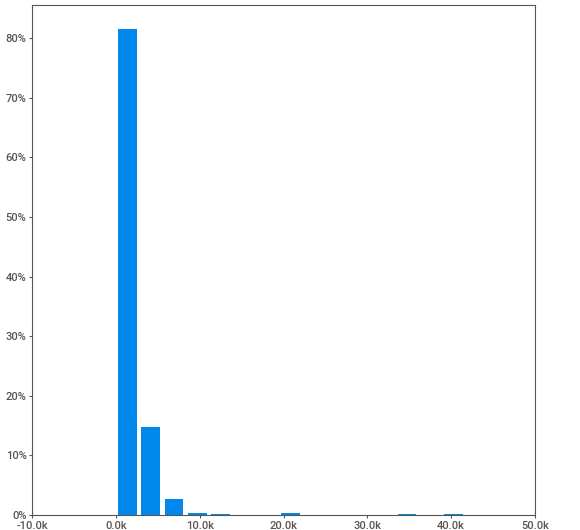
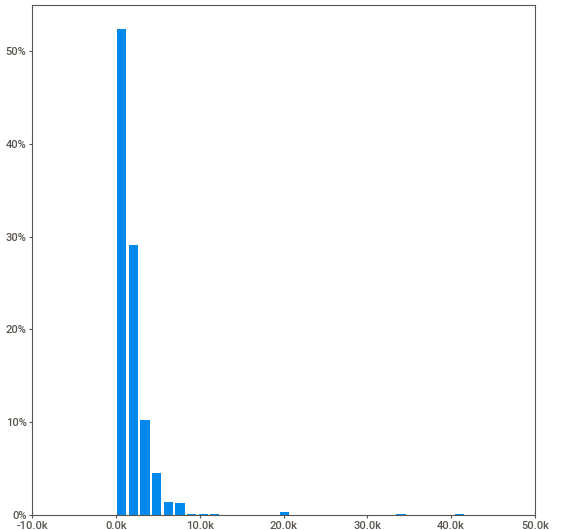
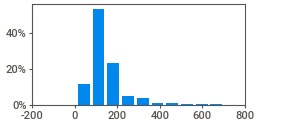
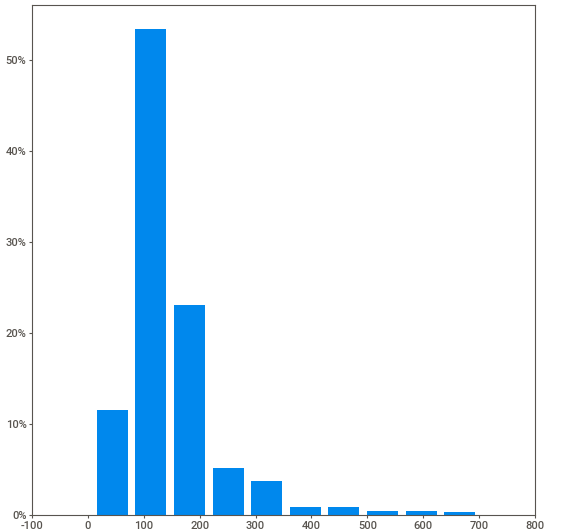
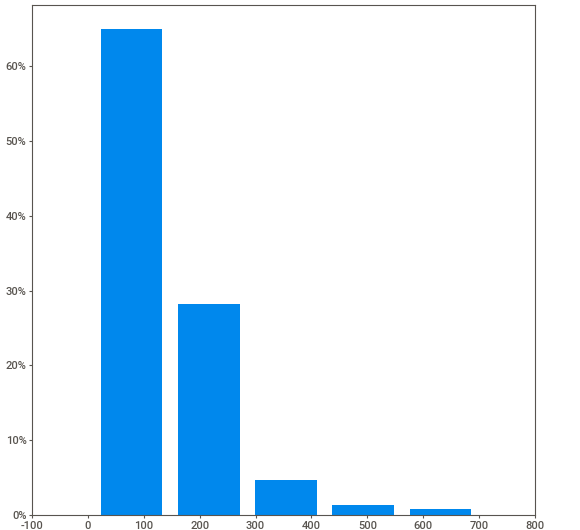
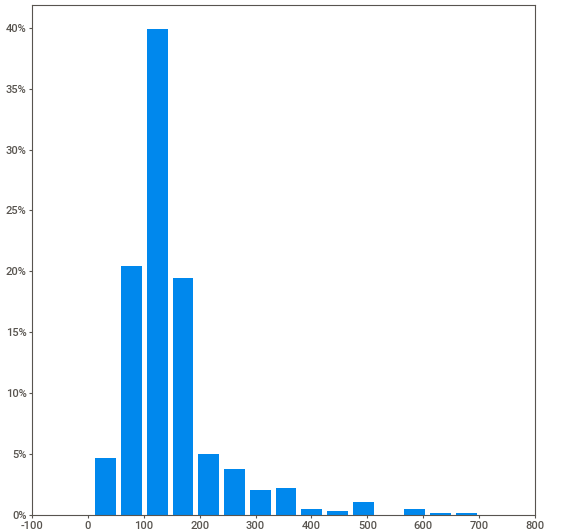
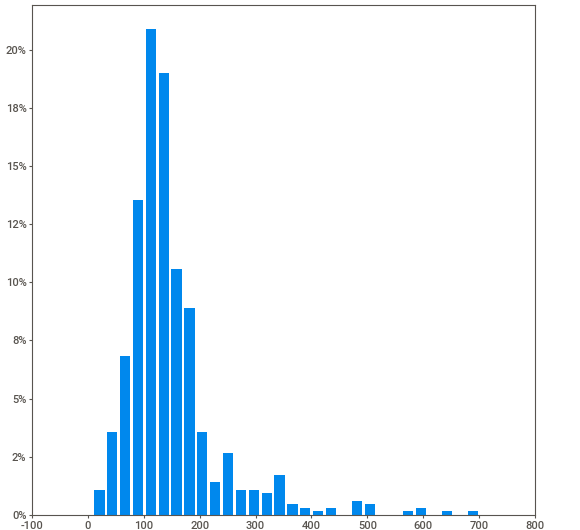
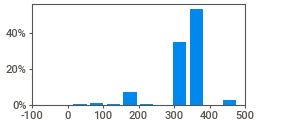
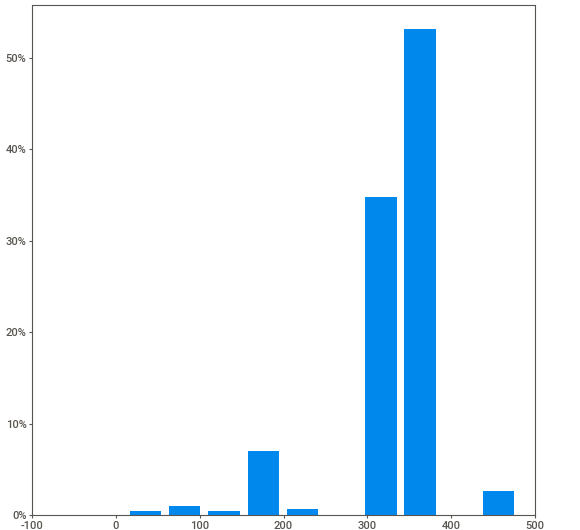
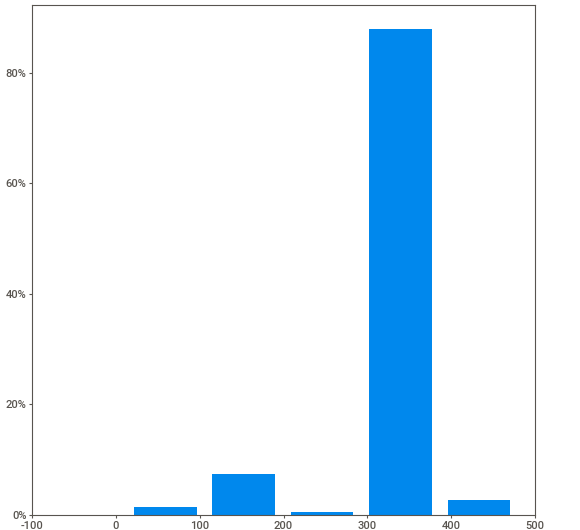
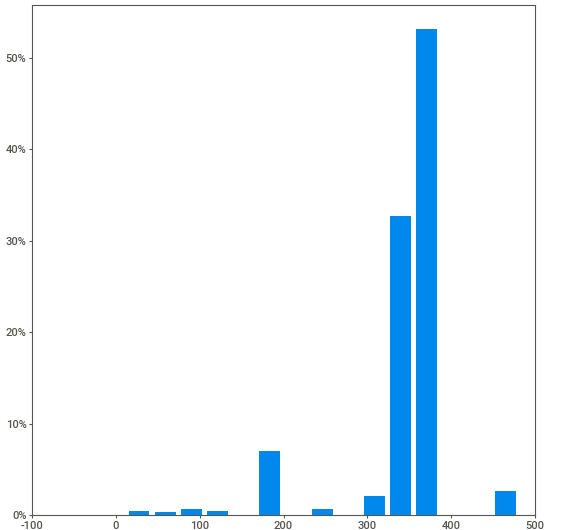
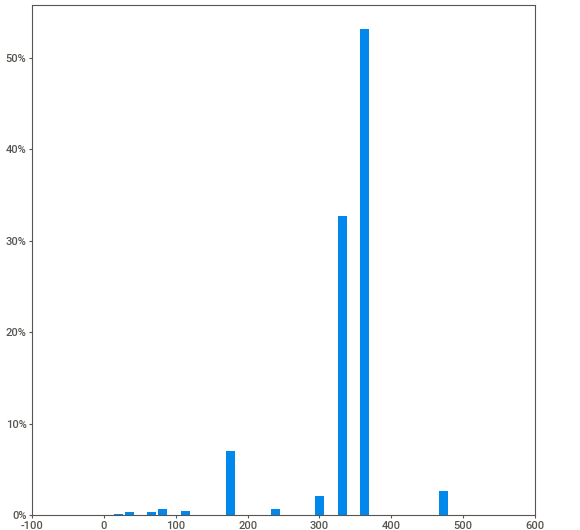
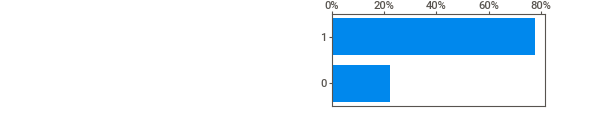
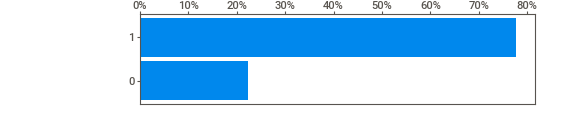
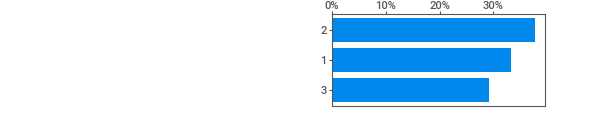
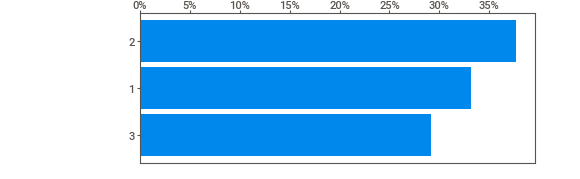
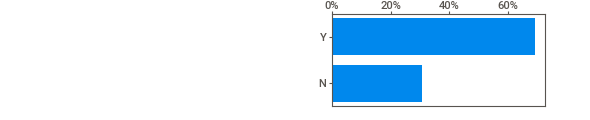
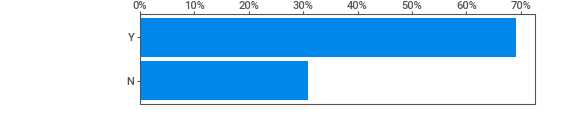
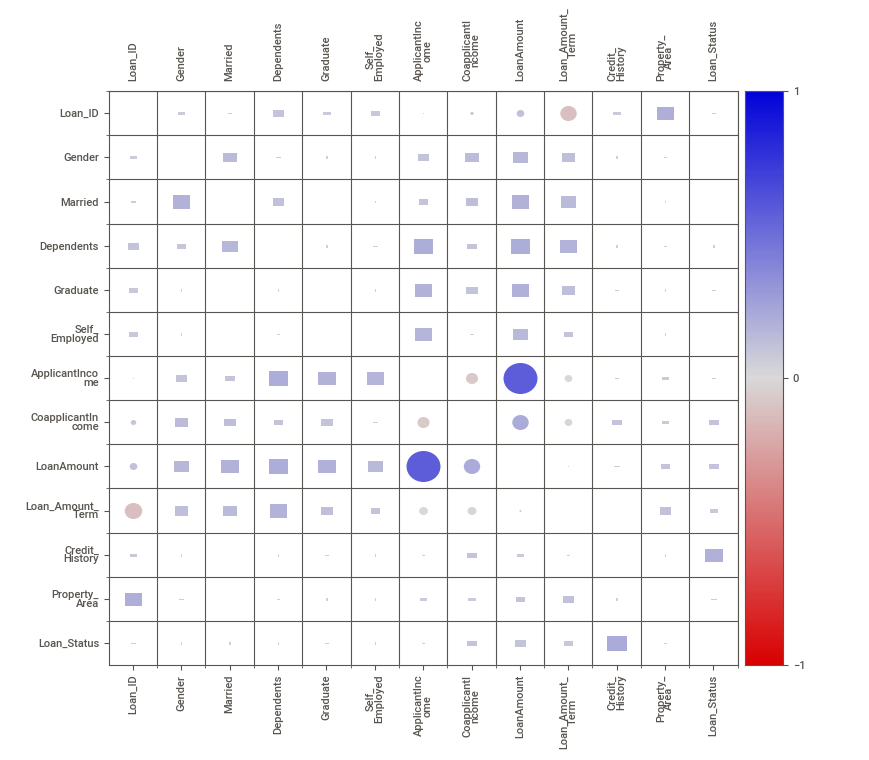
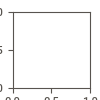

In [ ]:
# sweetviz is used to explore the dataframe a bit more
Report = sv.analyze(df)
Report.show_notebook()

In [ ]:
# learning more about the data set, count, average, etc. This can be used for cross checking calculations
df.describe()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,1997.070093,1.182243,0.651090,0.735202,0.783489,0.129283,5370.386293,1609.445047,148.230530,334.439252,0.777259,1.959502
std,554.745996,0.386346,0.476997,1.003103,0.412188,0.335775,6035.008001,2872.763920,86.301415,62.817346,0.416411,0.788912
min,1002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000
25%,1560.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2875.000000,0.000000,101.250000,333.000000,1.000000,1.000000
50%,1963.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1221.000000,128.000000,360.000000,1.000000,2.000000
75%,2448.750000,1.000000,1.000000,1.000000,1.000000,0.000000,5741.000000,2305.000000,168.000000,360.000000,1.000000,3.000000
max,2990.000000,2.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y


In [ ]:
# total number of applicants
total_applicants = len(df)

def total_applications():
  total_applicants
  print ('Total number of applications received ',  total_applicants)

In [ ]:
total_applications()

Total number of applications received  642


In [ ]:
# Approval number for female applicantions
female_applicants = df[df['Gender']>=2]

def female_applications():
    print ('Total number of female applications received ', len(female_applicants))

females_approved = female_applicants.apply(lambda x: True
                if x['Loan_Status'] == "Y" else False, axis = 1)

def female_applications_approved():
  len(females_approved)

female_applications()

females_approvedloan = len(females_approved[females_approved == True].index)
print('Number of female applications approved: ', females_approvedloan)

Total number of female applications received  117
Number of female applications approved:  80


In [ ]:
# Approval number for male applicantions
male_applicants = df[df['Gender']<=1]

def male_applications():
    print ('Total number of male applications received ', len(male_applicants))

males_approved = male_applicants.apply(lambda x: True
                if x['Loan_Status'] == "Y" else False, axis = 1)

def male_applications_approved():
  males_approvedloan = len(males_approved[males_approved == True].index)
  print('Number of male applications approved: ', males_approvedloan)

In [ ]:
male_applications()
male_applications_approved()

Total number of male applications received  525
Number of male applications approved:  364


In [ ]:
# female_applicants type is a string, hence requires to be converted to an integer to find out the %
def female_approval_rate():
  totalfemale_applicants = len(female_applicants)
  female_app_rate = round((females_approvedloan/totalfemale_applicants)*100)
  female_app_rate_all = round((females_approvedloan/total_applicants)*100)
  print('Female approval rate compared to all female applications is ',female_app_rate,'%')
  print('Female approval rate compared to all applications is', female_app_rate_all,'%')

In [ ]:
female_approval_rate()

Female approval rate compared to all female applications is  68 %
Female approval rate compared to all applications is 12 %


In [ ]:
# number of applicants by gender and loan Status, where 1 is a Male and 2 is a Female
# can be used as a check to make sure the formula above is right 
df.groupby(
    ['Loan_Status', 'Gender']
).agg(
    count_applicants=('Loan_ID','count')
)

count_applicants
Loan_Status Gender                  
N           1                    161
            2                     37
Y           1                    364
            2                     80

In [ ]:
# average income of all applicants
def average_income_all():
  applicant_income = round(df['ApplicantIncome'].mean())
  print('Average income of all aplicants is ', applicant_income)

average_income_all()

Average income of all aplicants is  5370


In [ ]:
# Self-employed N = 0, Y = 1, can sum up all the numbers to see how many are self-employed
def average_income_self():
  self_employed = df[df['Self_Employed']>=1]
  av_self_employed_income = round(self_employed['ApplicantIncome'].mean())
  print ('Number of self-employed applicats received is', len(self_employed))
  print('Average income of self employed is ', av_self_employed_income)

average_income_self()

Number of self-employed applicats received is 83
Average income of self employed is  7341


In [ ]:
# The average income of all applicants that are not self-employed 
def average_income_non_self():
  not_self_employed = df[df['Self_Employed']<=0]
  av_non_self_income = round(not_self_employed['ApplicantIncome'].mean())
  print ('Number of applications received from none self-employed  ', len(not_self_employed))
  print('Average income of not self employed is ', av_non_self_income)

average_income_non_self()

Number of applications received from none self-employed   559
Average income of not self employed is  5078


In [ ]:
#Average income of all graduate applicants
graduates = df[df['Graduate']>=1]

def average_income_graduates():
  av_graduate_income = round(graduates['ApplicantIncome'].mean())
  print ('Number of applications from graduates received ', len(graduates))
  print ('Average income of graduates who submitted an application is ', av_graduate_income)

average_income_graduates()

Number of applications from graduates received  503
Average income of graduates who submitted an application is  5819


In [ ]:
graduate_applications = len(graduates)

graduates_approved = graduates.apply(lambda x: True
                  if x['Loan_Status'] == "Y" else False, axis = 1)
graduates_approved_loan = len(graduates_approved[graduates_approved == True].index)
print('Number of applications submitted by graduates and approved: ', graduates_approved_loan)

Number of applications submitted by graduates and approved:  360


In [ ]:
# graduate approval rate
def graduates_approved_rate():
    grad_approved_rate = round((graduates_approved_loan/total_applicants)*100)
    print('Percentage of graduate applications approved from the total number of applications is ',grad_approved_rate,'%')

graduates_approved_rate()

Percentage of graduate applications approved from the total number of applications is  56 %


In [ ]:
# Male & Female application ratio

def female_applicant_ratio():
    f_ratio = len(female_applicants)/(len(female_applicants)+len(male_applicants))*100
    f_m_ratio = len(female_applicants)/len(male_applicants)*100
    print('Female to all applications ratio', int(f_ratio), '%')
    print('Female to male applicant ratio', int(f_m_ratio),'%')

female_applicant_ratio()

Female to all applications ratio 18 %
Female to male applicant ratio 22 %


In [ ]:
# Self-employed analysis 
def self_employed_ratio():
  self_employed = df[df['Self_Employed']>=1]
  num_self = len(self_employed)
  ratio = (num_self/total_applicants)*100
  print ('Self-employed application ratio compared to all applications', round(ratio), '%')

def self_employed_income_ratio():
  average_income = round(df['ApplicantIncome'].mean())
  self_employed = df[df['Self_Employed']>=1]
  self_employed_income = round(self_employed['ApplicantIncome'].mean())
  self_income_ratio = round(((self_employed_income/average_income)-1)*100)
  print ('Self-employed applicants tend to have', self_income_ratio, '% more income than an average applicant')

self_employed_income_ratio()

Self-employed applicants tend to have 37 % more income than an average applicant


In [ ]:
# converting to series to visual the data
seriesdata = df[['Gender','Married','Graduate','Self_Employed','ApplicantIncome','Credit_History','Property_Area', 'Loan_Status']]
print(x)

     Loan_ID  Gender  Married  Graduate  Self_Employed  ApplicantIncome  \
0       1002       1        0         1              0             5849   
1       1003       1        1         1              0             4583   
2       1005       1        1         1              1             3000   
3       1006       1        1         0              0             2583   
4       1008       1        0         1              0             6000   
..       ...     ...      ...       ...            ...              ...   
242     2978       2        0         1              0             2900   
243     2979       1        1         1              0             4106   
244     2983       1        1         1              0             8072   
245     2984       1        1         1              0             7583   
246     2990       2        0         1              1             4583   

     Credit_History  Property_Area Loan_Status  
0                 1              1           Y  
1

In [ ]:
# Summary
female_approval_rate()
average_income_all()
average_income_self()
average_income_non_self()
average_income_graduates()
graduates_approved_rate()

Female approval rate compared to all female applications is  68 %
Female approval rate compared to all applications is 12 %
Average income of all aplicants is  5370
Number of self-employed applicats received is 83
Average income of self employed is  7341
Number of applications received from none self-employed   559
Average income of not self employed is  5078
Number of applications from graduates received  503
Average income of graduates who submitted an application is  5819
Percentage of graduate applications approved from the total number of applications is  56 %


In [ ]:
#additional
total_applications()
female_applications()
male_applications()
male_applications_approved()
graduate_applications_approved()
female_applicant_ratio()
self_employed_ratio()
self_employed_income_ratio()

Total number of applications received  642
Total number of female applications received  117
Total number of male applications received  525
Number of male applications approved:  364
Number of applications submitted by graduates and approved:  503
Female to all applications ratio 18 %
Female to male applicant ratio 22 %
Self-employed application ratio compared to all applications 13 %
Self-employed applicants tend to have 37 % more income than an average applicant


#Summary: 
* 
In total, 18% of all applications received were submitted by women. The ratio of female to male applications is 22%. Thus, 1 in 5 applicants is female.
* Females who had their application approved constitute of 12% of the total applications received. However, 68% of female applications are approved from all female applications. 
* Average income for all applicants is 5370, whilst average income for self-employed is 7341. As a result, self-employed income is 37% higher than an average applicant income. However, only 13% of total applications received are from self-employed.
* Graduate application approval rate is 56%. Suggesting that if an applicant is a graduate, 1 in every 2 will get their application approved.

##Ethical considerations: 


*   Ensuring that customers are treated fairly and equaly regardless of their status, in particular related to one of the protected characteristics as part of The Equality Act 2010 (e.g. Gender). 
*   Ensuring that historic data is balanced and will not cause biases in the model when a decision is being made on whether or not somebody should be approved for a loan. 



## Prediction for future loan applications

In [ ]:
# importing additional libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# visualisation
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.metrics import confusion_matrix

In [ ]:
# converting values into booleans
df['Loan_Status'] = df['Loan_Status'].replace({'N':0, 'Y':1})
df.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,1
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,0
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,1
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,1
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,1


In [ ]:
# preparing my table to only include the columns specified in the assessment brief
assessment_data=df.drop(['Loan_ID','Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)
assessment_data.head()

,Gender,Married,Graduate,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,1,0,1,1,1
1,1,1,1,0,1,3,0
2,1,1,1,1,1,1,1
3,1,1,0,0,1,1,1
4,1,0,1,0,1,1,1


In [ ]:
# implementing features and label
X = assessment_data.drop(['Loan_Status'],axis=1)
y = assessment_data['Loan_Status']

In [ ]:
# splitting data set to 70% test, 30% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                         stratify=y.values, random_state=0)

In [ ]:
# checking the size of the data frame to be used to train the model on
size = len(df)
print('Data frame Size',size)
traindata = round(size*0.7)
print('Train data', traindata)
testdata = size - traindata
print('test data', testdata)

Data frame Size 642
Train data 449
test data 193


In [ ]:
# check length that was assigned
print(len(y_train))
print(len(X_train))
print(len(y_test))
print(len(X_test))

449
449
193
193


In [ ]:
# fit function x training data and will fit it with labels 'Loan_Status'
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# start making the predictions
y_pred = regressor.predict(X_test)

In [ ]:
# taking the output and putting it together with the predicted
datacomparison = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
datacomparison

,Actual,Predicted
36,0,0.285714
41,1,0.619048
292,1,0.840000
3,1,0.833333
146,0,0.925926
...,...,...
19,1,0.840000
227,1,0.925926
353,0,1.000000
2,0,0.285714


In [ ]:
# the lower the mean squared error the better the model is
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error', metrics.mean_squared_error(y_test,y_pred))
print('Mean squared error', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error: 0.3327363320978073
Mean squared error 0.19870025135992248
Mean squared error 0.44575806370712184


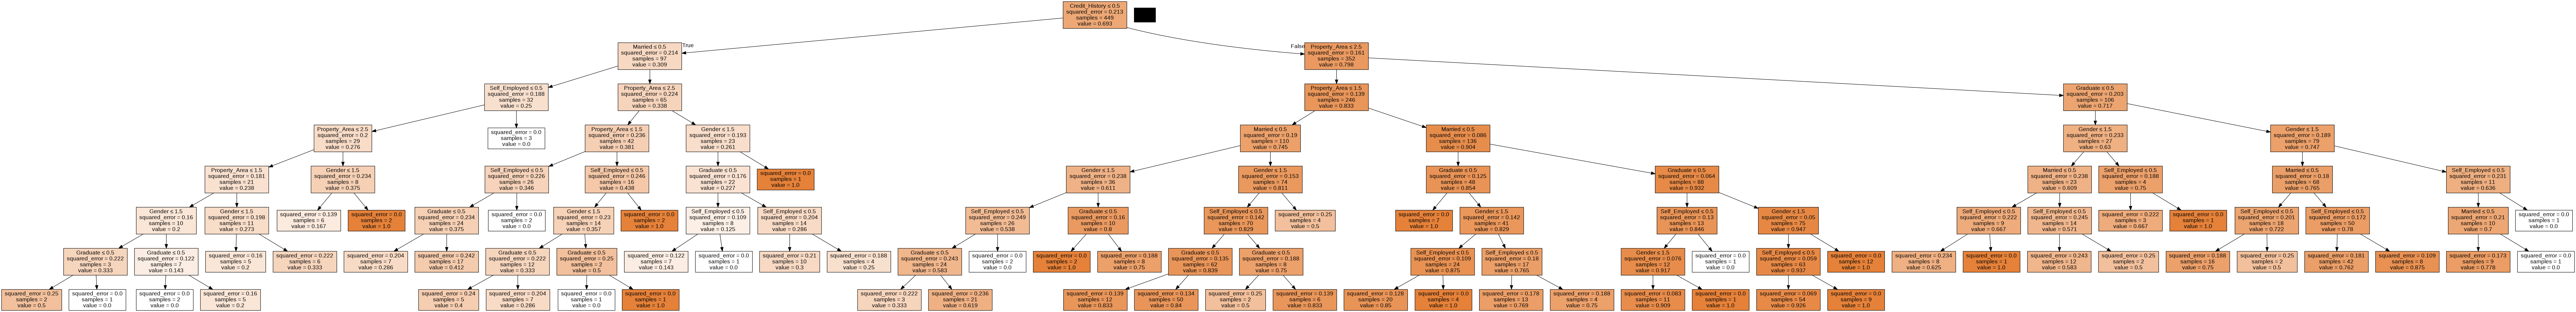

In [ ]:
# creating a decision tree visual
dot_data = StringIO()
feature_cols = ['Gender', 'Married', 'Graduate', 'Self_Employed', 'Credit_History', 'Property_Area']
export_graphviz(regressor, out_file=dot_data, filled = True,
                rounded = False, special_characters = True,
                feature_names = feature_cols)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('loanstatus.png')
Image(graph.create_png())

In [ ]:
# coorelation matrix plot

def corr_heatmap(df):
    if isinstance(df, pd.DataFrame):
        fig, ax = plt.subplots(figsize=(8,4))
        mask = np.zeros_like(df.corr(), dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True 
        ax = sns.heatmap(df.corr().round(2), mask=mask, ax=ax, cmap=sns.diverging_palette(230,20, as_cmap=True), annot=True, fmt='.2g')
        plt.title('Loan data set correlation Heatmap', fontsize=16)
        plt.xticks(rotation = 80)
    else:
        print('pd.DataFrame object needed!')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


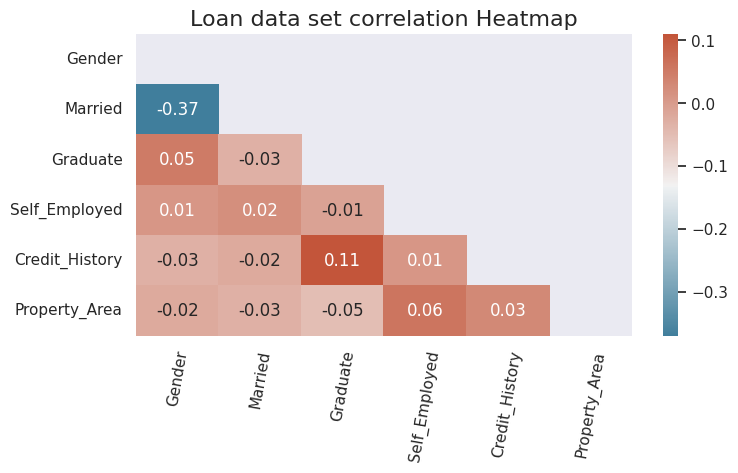

In [ ]:
#plotting the correlation map 
sns.set(font_scale=1)
corr_heatmap(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


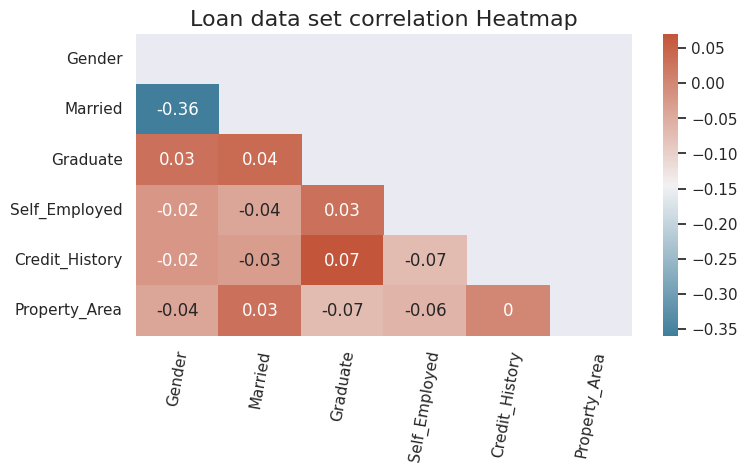

In [ ]:
# looking at the coorelation on the smaller data set 
corr_heatmap(X_test)

* the correlation heat map suggests that there is very little correlation between the 
variables.

In [ ]:
# feature importance plot

def feat_importance(df, target):
    if isinstance(df, pd.DataFrame):
        X = df.drop(target, axis=1).fillna(0) 
        y = df[target]    
        from sklearn.ensemble import RandomForestClassifier
        forest = RandomForestClassifier(n_estimators=5, max_depth=6, min_samples_leaf=6,
                                min_samples_split=10, random_state=42)
        forest.fit(X,y)
        # visualize
        sns.set()
        plt.figure(figsize=(5,4))
        importances = pd.Series(forest.feature_importances_, index=X.columns)
        importances.nlargest(5).sort_values().plot(kind='barh')
        plt.title('Feature Importance for Loan_Status', fontsize=12)
        plt.xlabel('Importance')
        plt.show()
    else:
        print('pd.DataFrame object needed')

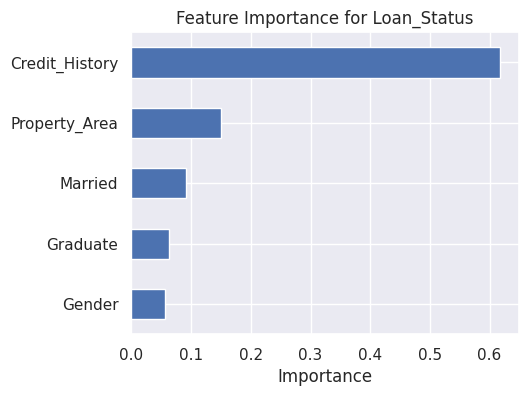

In [ ]:
# variable feature importance

df_train = pd.concat([X_train, y_train], axis=1)

feat_importance(df_train.select_dtypes(exclude='object'), 'Loan_Status')

* The results suggest that the most important feature is Credit_History, followed by Property_Area
* The least important feature is whether somebody is Self-employed